# Importing Libraries

In [3]:
# Import relevant libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.style as style
# Import tensorflow
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
sns.set()
pd.set_option('max_columns', None)

# Loading Dataset

In [6]:
# Load the dataset
df = pd.read_csv('BankChurners.csv')

In [7]:
# Take a first glimpse at the data
df.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000


In [8]:
df.isnull().sum()

CLIENTNUM                   0
Attrition_Flag              0
Customer_Age                0
Gender                      0
Dependent_count             0
Education_Level             0
Marital_Status              0
Income_Category             0
Card_Category               0
Months_on_book              0
Total_Relationship_Count    0
Months_Inactive_12_mon      0
Contacts_Count_12_mon       0
Credit_Limit                0
Total_Revolving_Bal         0
Avg_Open_To_Buy             0
Total_Amt_Chng_Q4_Q1        0
Total_Trans_Amt             0
Total_Trans_Ct              0
Total_Ct_Chng_Q4_Q1         0
Avg_Utilization_Ratio       0
dtype: int64

In [9]:
df.columns

Index(['CLIENTNUM', 'Attrition_Flag', 'Customer_Age', 'Gender',
       'Dependent_count', 'Education_Level', 'Marital_Status',
       'Income_Category', 'Card_Category', 'Months_on_book',
       'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio'],
      dtype='object')

# EDA

In [10]:
# Explore the variables
df.describe(include =  'all')

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
count,1.012700e+04,10127,10127.000000,10127,10127.000000,10127,10127,10127,10127,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000
unique,NaN,2,NaN,2,NaN,7,4,6,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,Existing Customer,NaN,F,NaN,Graduate,Married,Less than $40K,Blue,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,8500,NaN,5358,NaN,3128,4687,3561,9436,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,7.391776e+08,NaN,46.325960,NaN,2.346203,NaN,NaN,NaN,NaN,35.928409,3.812580,2.341167,2.455317,8631.953698,1162.814061,7469.139637,0.759941,4404.086304,64.858695,0.712222,0.274894
std,3.690378e+07,NaN,8.016814,NaN,1.298908,NaN,NaN,NaN,NaN,7.986416,1.554408,1.010622,1.106225,9088.776650,814.987335,9090.685324,0.219207,3397.129254,23.472570,0.238086,0.275691
min,7.080821e+08,NaN,26.000000,NaN,0.000000,NaN,NaN,NaN,NaN,13.000000,1.000000,0.000000,0.000000,1438.300000,0.000000,3.000000,0.000000,510.000000,10.000000,0.000000,0.000000
25%,7.130368e+08,NaN,41.000000,NaN,1.000000,NaN,NaN,NaN,NaN,31.000000,3.000000,2.000000,2.000000,2555.000000,359.000000,1324.500000,0.631000,2155.500000,45.000000,0.582000,0.023000
50%,7.179264e+08,NaN,46.000000,NaN,2.000000,NaN,NaN,NaN,NaN,36.000000,4.000000,2.000000,2.000000,4549.000000,1276.000000,3474.000000,0.736000,3899.000000,67.000000,0.702000,0.176000
75%,7.731435e+08,NaN,52.000000,NaN,3.000000,NaN,NaN,NaN,NaN,40.000000,5.000000,3.000000,3.000000,11067.500000,1784.000000,9859.000000,0.859000,4741.000000,81.000000,0.818000,0.503000


In [11]:
df['Education_Level'].value_counts()

Graduate         3128
High School      2013
Unknown          1519
Uneducated       1487
College          1013
Post-Graduate     516
Doctorate         451
Name: Education_Level, dtype: int64

In [9]:
df['Marital_Status'].value_counts()

Married     4687
Single      3943
Unknown      749
Divorced     748
Name: Marital_Status, dtype: int64

In [10]:
df['Income_Category'].value_counts()

Less than $40K    3561
$40K - $60K       1790
$80K - $120K      1535
$60K - $80K       1402
Unknown           1112
$120K +            727
Name: Income_Category, dtype: int64

In [11]:
df['Card_Category'].value_counts()

Blue        9436
Silver       555
Gold         116
Platinum      20
Name: Card_Category, dtype: int64

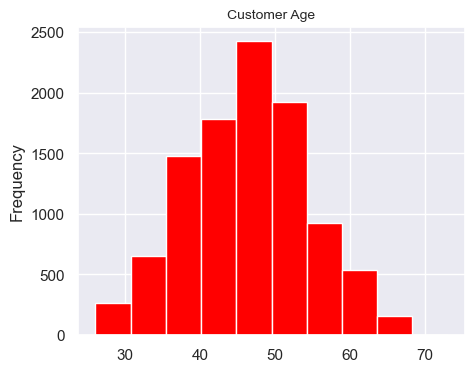

In [12]:
df['Customer_Age'].plot(kind = 'hist', figsize = (5, 4), color='red')
plt.title("Customer Age", size = 10)
plt.show()

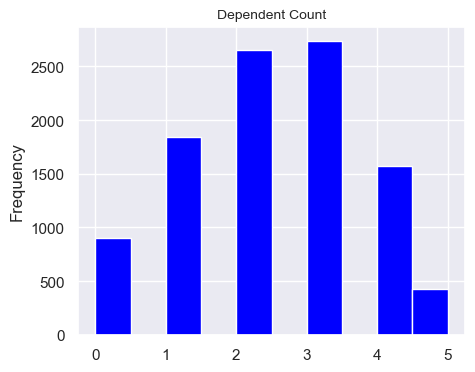

In [13]:
df['Dependent_count'].plot(kind = 'hist', figsize = (5, 4), color = 'blue')
plt.title("Dependent Count", size = 10)
plt.show()

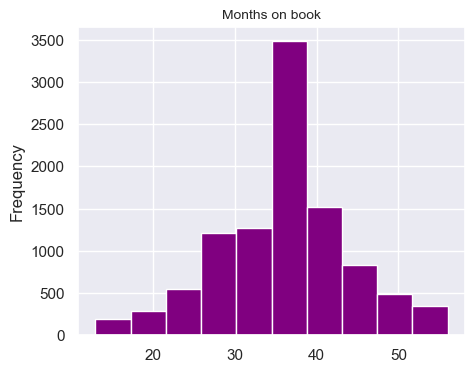

In [15]:
df['Months_on_book'].plot(kind = 'hist', figsize = (5, 4), color = 'purple')
plt.title("Months on book", size = 10)
plt.show()

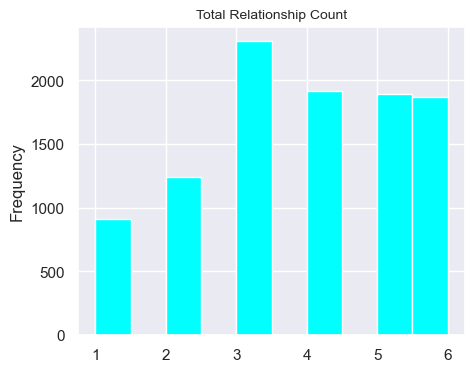

In [16]:
df['Total_Relationship_Count'].plot(kind = 'hist', figsize = (5, 4), color = 'cyan')
plt.title("Total Relationship Count", size = 10)
plt.show()

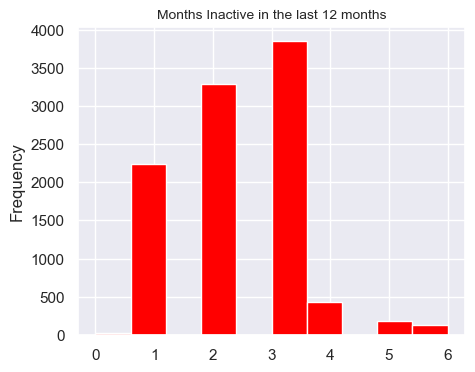

In [17]:
df['Months_Inactive_12_mon'].plot(kind = 'hist', figsize = (5, 4), color = 'red')
plt.title("Months Inactive in the last 12 months", size = 10)
plt.show()

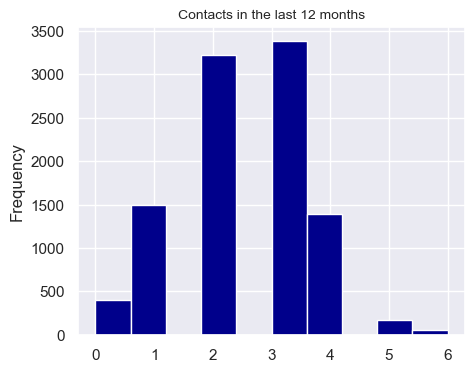

In [18]:
df['Contacts_Count_12_mon'].plot(kind = 'hist', figsize = (5, 4), color = 'darkblue')
plt.title("Contacts in the last 12 months", size = 10)
plt.show()

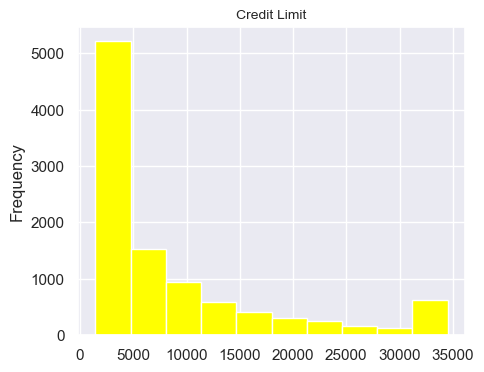

In [19]:
df['Credit_Limit'].plot(kind = 'hist', figsize = (5, 4), color = 'yellow')
plt.title("Credit Limit", size = 10)
plt.show()

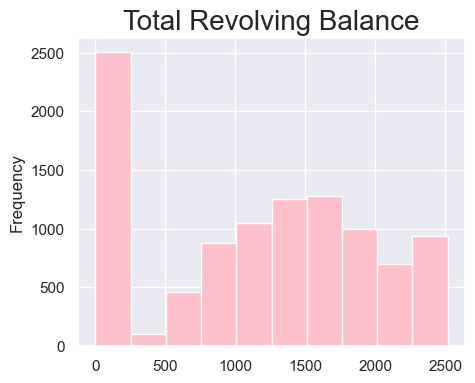

In [20]:
df['Total_Revolving_Bal'].plot(kind = 'hist', figsize = (5, 4), color = 'pink')
plt.title("Total Revolving Balance", size = 20)
plt.show()

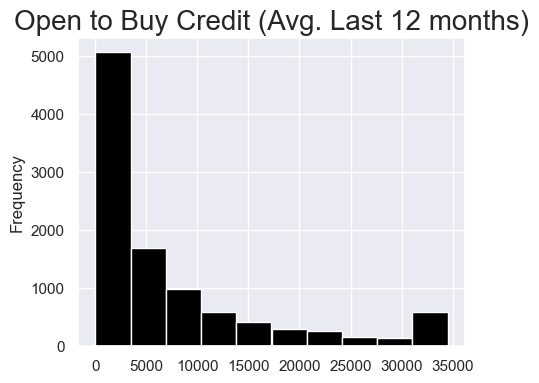

In [22]:
df['Avg_Open_To_Buy'].plot(kind = 'hist', figsize = (5, 4), color = 'black')
plt.title("Open to Buy Credit (Avg. Last 12 months)", size = 20)
plt.show()

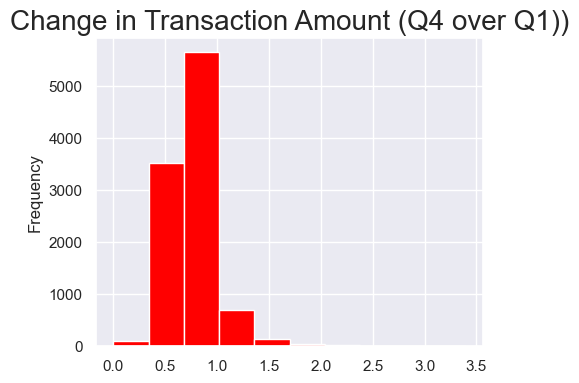

In [23]:
df['Total_Amt_Chng_Q4_Q1'].plot(kind = 'hist', figsize = (5, 4), color = 'red')
plt.title("Change in Transaction Amount (Q4 over Q1))", size = 20)
plt.show()

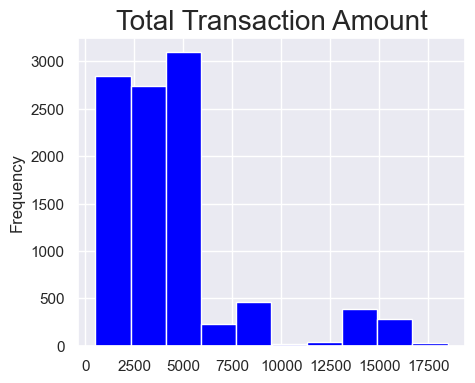

In [25]:
df['Total_Trans_Amt'].plot(kind = 'hist', figsize = (5, 4), color = 'blue')
plt.title("Total Transaction Amount", size = 20)
plt.show()

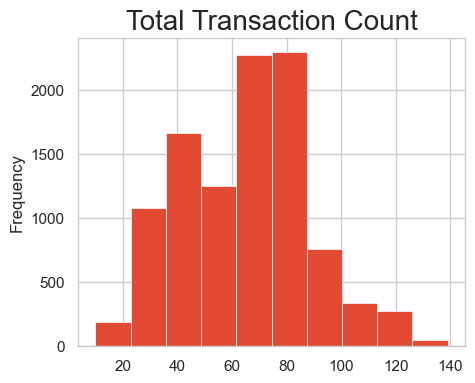

In [33]:
df['Total_Trans_Ct'].plot(kind = 'hist', figsize = (5, 4))
plt.title("Total Transaction Count", size = 20)
plt.show()

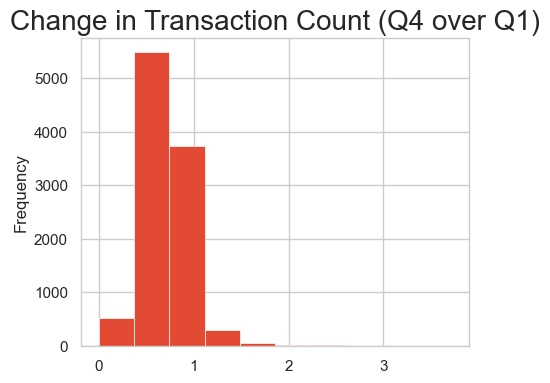

In [34]:
df['Total_Ct_Chng_Q4_Q1'].plot(kind = 'hist', figsize = (5, 4))
plt.title("Change in Transaction Count (Q4 over Q1)", size = 20)
plt.show()

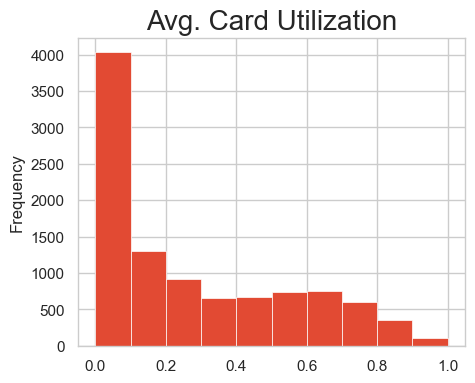

In [78]:
df['Avg_Utilization_Ratio'].plot(kind = 'hist', figsize = (5, 4))
plt.title("Avg. Card Utilization", size = 20)
plt.show()

In [22]:
#Churn vs. normal 
counts = df.Attrition_Flag.value_counts()
normal = counts[0]
Churn = counts[1]
perc_normal = (normal/(normal+Churn))*100
perc_Churn = (Churn/(normal+Churn))*100
print('There were {} non-Churn ({:.3f}%) and {} Churn ({:.3f}%).'.format(normal, perc_normal, Churn, perc_Churn))

There were 8500 non-Churn (83.934%) and 1627 Churn (16.066%).


C:\Users\DELL\AppData\Local\Temp\ipykernel_9772\3171721159.py:5: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros_like(dataset.corr(), dtype=np.bool)


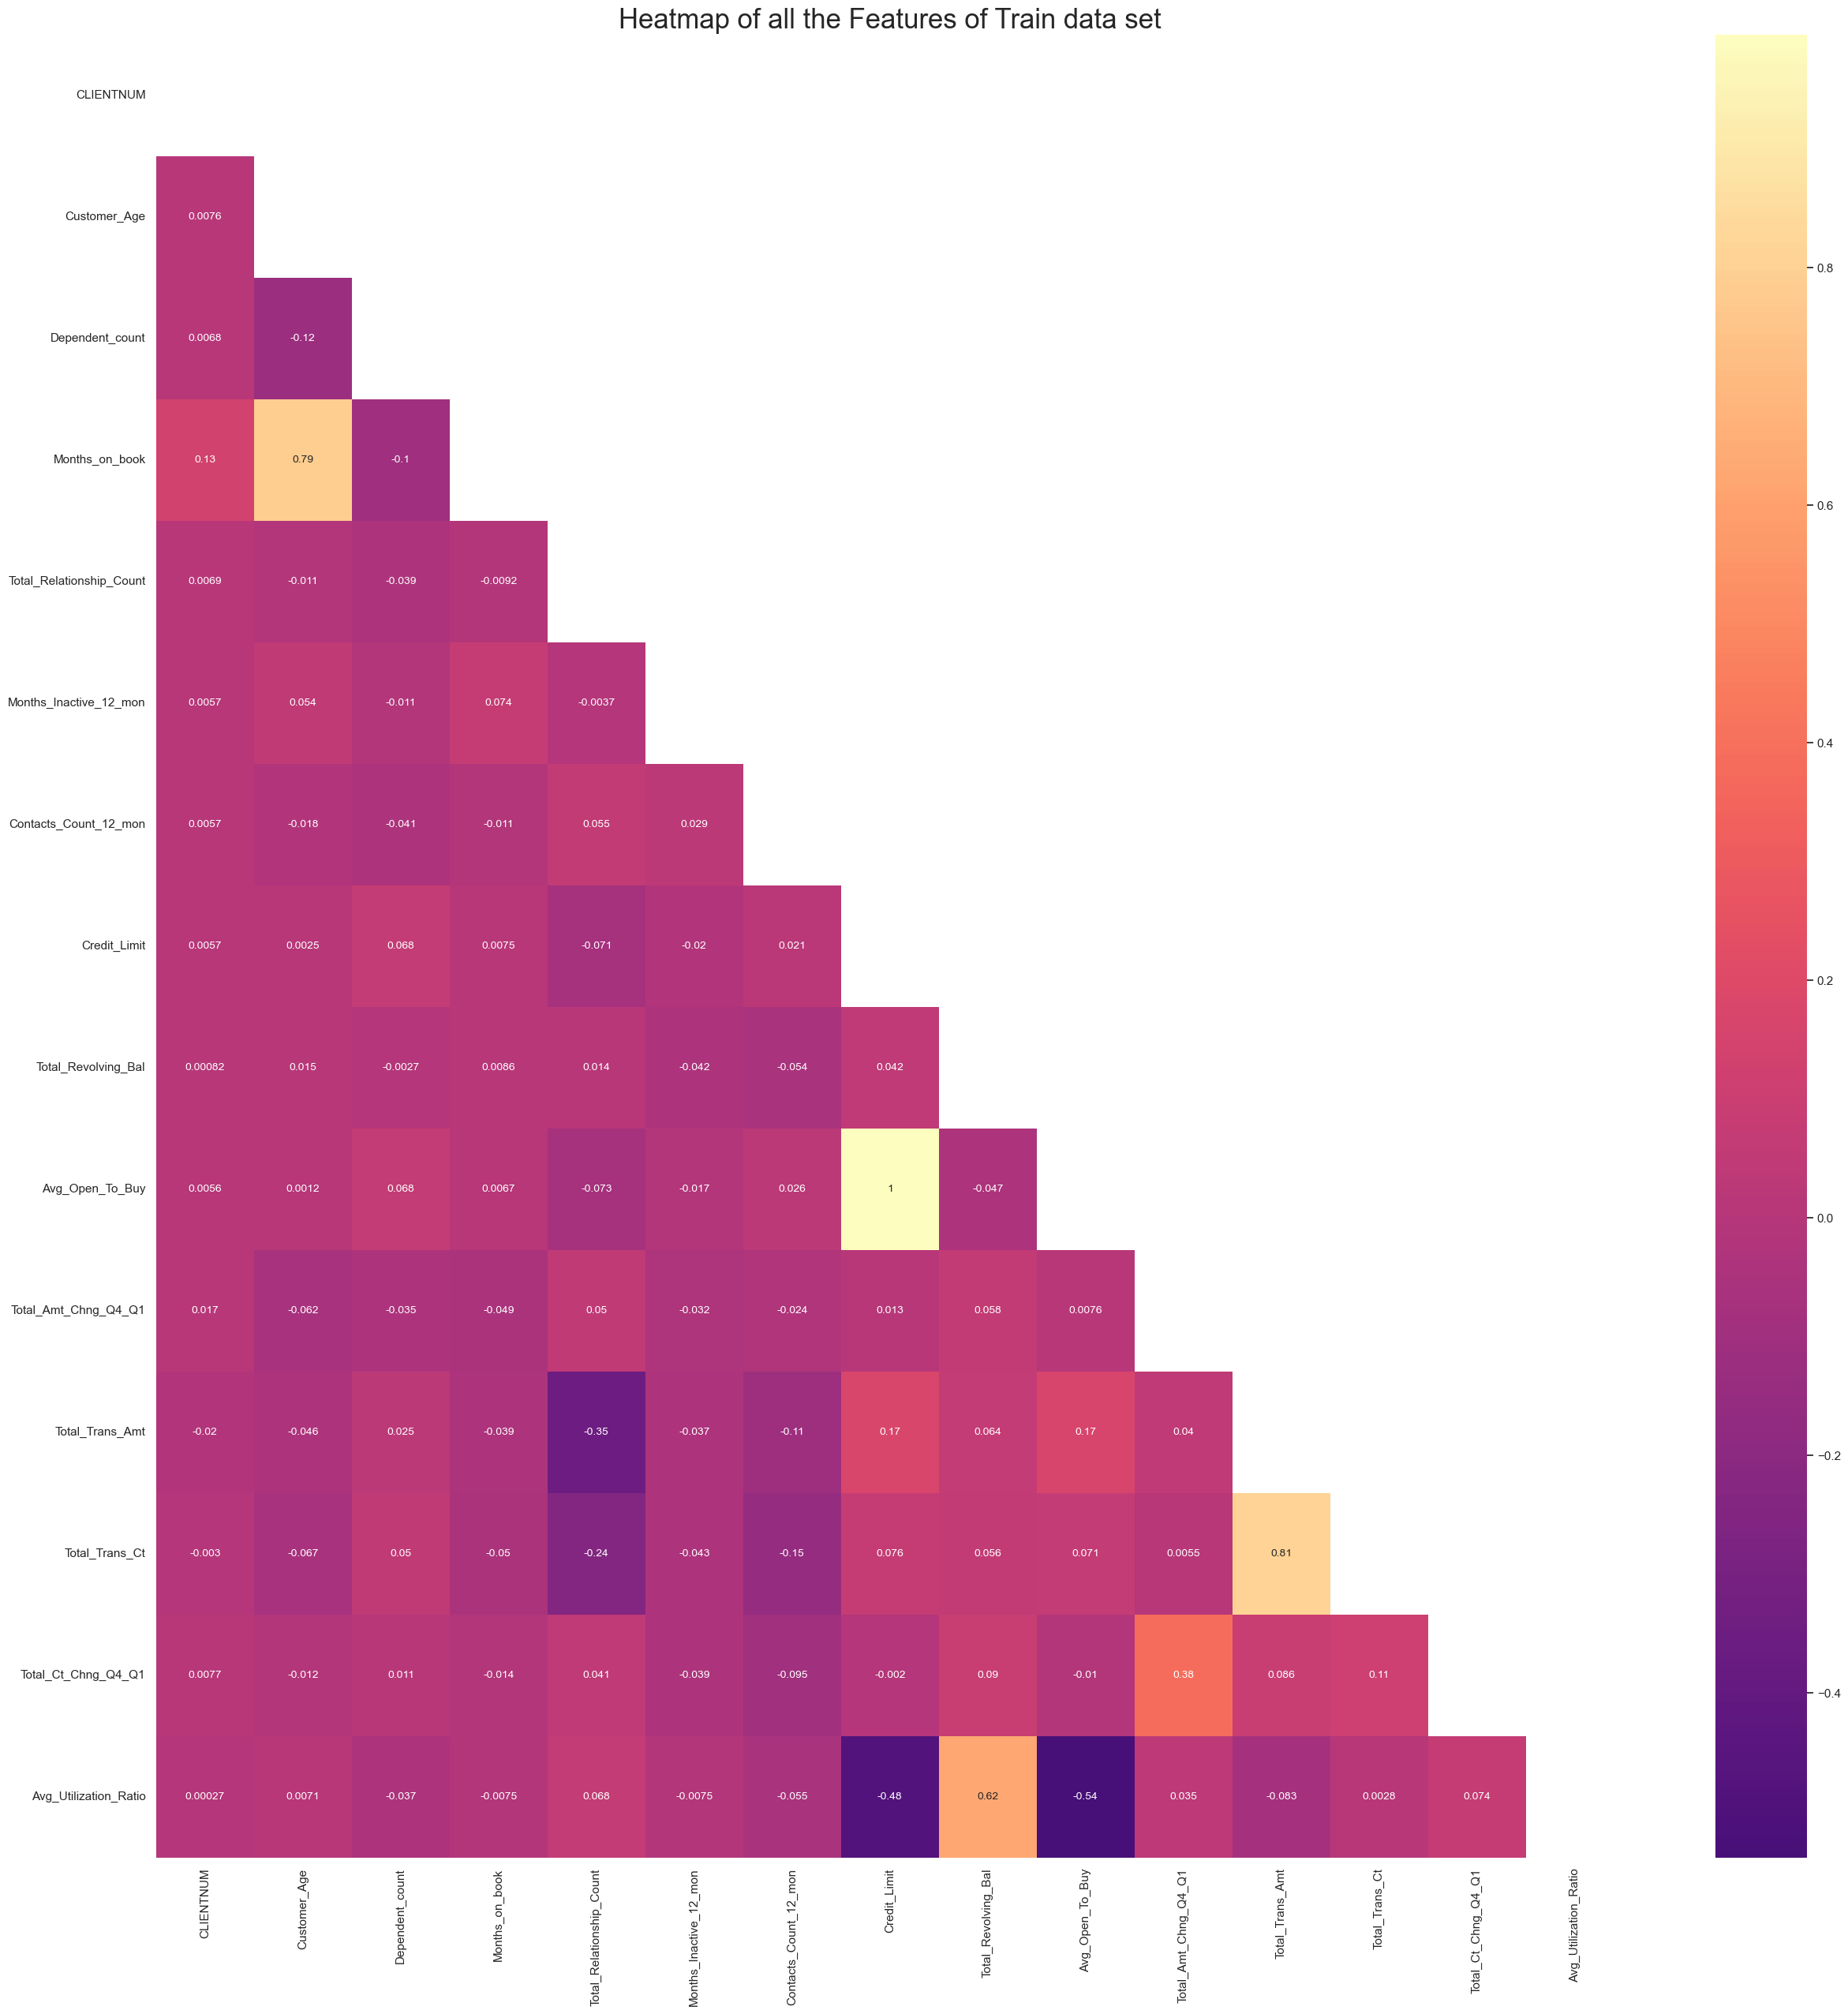

In [28]:
style.use('ggplot')
sns.set_style('whitegrid')
plt.subplots(figsize = (30,30))
## Plotting heatmap. Generate a mask for the upper triangle (taken from seaborn example gallery)
mask = np.zeros_like(df.corr(), dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(df.corr(), cmap = "magma", annot=True, mask=mask, center = 0, );
plt.title("Heatmap of all the Features of Train data set", fontsize = 25);

# Pre-processing

In [29]:
X = df.iloc[:,2:]

In [30]:
y = df.iloc[:,1]

In [31]:
# Split the data into train and test sets 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)

In [32]:
# Encode the response variables to 0s and 1s
le = LabelEncoder()
y_train = le.fit_transform(y_train)
y_test = le.fit_transform(y_test)
print(y_train)
print(y_test)

[1 1 1 ... 0 1 1]
[1 1 1 ... 1 1 1]


In [33]:
# Perform feature scaling to the continuous variables 
sc = StandardScaler()
X_train.iloc[:,[0,2,7,8,9,10,11,12,13,14,15,16,17,18]] = sc.fit_transform(X_train.iloc[:,[0,2,7,8,9,10,11,12,13,14,15,16,17,18]])
X_test.iloc[:,[0,2,7,8,9,10,11,12,13,14,15,16,17,18]] = sc.transform(X_test.iloc[:,[0,2,7,8,9,10,11,12,13,14,15,16,17,18]])

In [34]:
# Turn the categorical variables into dummy variables 

ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [1, 3, 4, 5, 6])], remainder='passthrough')
X_train = np.array(ct.fit_transform(X_train))
X_test = np.array(ct.fit_transform(X_test))

# ML algorithms and Evaluation

## knn 

In [79]:
# Train the model
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
classifier.fit(X_train, y_train)

KNeighborsClassifier()

In [80]:
# Test the model
y_pred_knn = classifier.predict(X_test)
print(np.concatenate((y_pred_knn.reshape(len(y_pred_knn),1), y_test.reshape(len(y_test),1)),1))

[[1 1]
 [1 1]
 [1 1]
 ...
 [1 1]
 [1 1]
 [1 1]]


C:\Users\DELL\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


[[ 200  131]
 [  41 1654]]
0.9151036525172754
              precision    recall  f1-score   support

           0       0.83      0.60      0.70       331
           1       0.93      0.98      0.95      1695

    accuracy                           0.92      2026
   macro avg       0.88      0.79      0.82      2026
weighted avg       0.91      0.92      0.91      2026



Text(0.5, 1.0, 'knn confusion matrix')

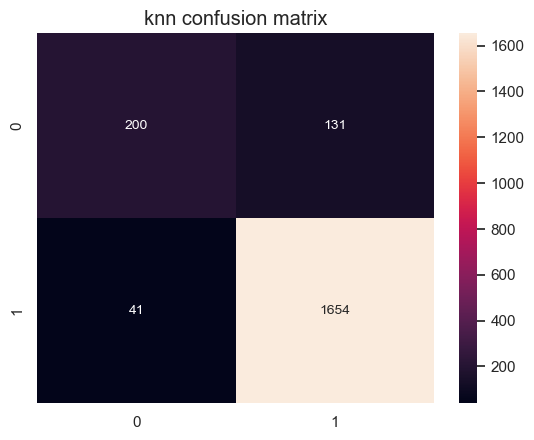

In [81]:
# Build the confusion matrix
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
cm = confusion_matrix(y_test, y_pred_knn)
print(cm)
print(accuracy_score(y_test, y_pred_knn))
print(classification_report(y_test,y_pred_knn))
sns.heatmap(cm, annot=True, fmt='d').set_title('knn confusion matrix')

## Logistic Regression

In [82]:
# Train the model
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)

LogisticRegression(random_state=0)

In [83]:
# Test the model
y_pred_lr = classifier.predict(X_test)
print(np.concatenate((y_pred_lr.reshape(len(y_pred_lr),1), y_test.reshape(len(y_test),1)),1))

[[1 1]
 [1 1]
 [1 1]
 ...
 [1 1]
 [1 1]
 [1 1]]


[[ 190  141]
 [  55 1640]]
0.9032576505429417
              precision    recall  f1-score   support

           0       0.78      0.57      0.66       331
           1       0.92      0.97      0.94      1695

    accuracy                           0.90      2026
   macro avg       0.85      0.77      0.80      2026
weighted avg       0.90      0.90      0.90      2026



Text(0.5, 1.0, 'Logistic Regression confusion matrix')

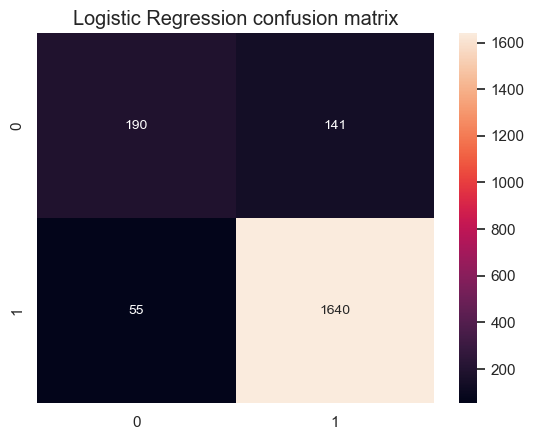

In [84]:
# Build the confusion matrix
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred_lr)
print(cm)
print(accuracy_score(y_test, y_pred_lr))
print(classification_report(y_test,y_pred_lr))
sns.heatmap(cm, annot=True, fmt='d').set_title('Logistic Regression confusion matrix')

## SVM 

In [90]:
# Train the model
from sklearn.svm import SVC
classifier = SVC(kernel = 'linear', random_state = 0)
classifier.fit(X_train, y_train)

SVC(kernel='linear', random_state=0)

In [91]:
# Test the model
y_pred_svm = classifier.predict(X_test)
print(np.concatenate((y_pred_svm.reshape(len(y_pred_svm),1), y_test.reshape(len(y_test),1)),1))

[[1 1]
 [1 1]
 [1 1]
 ...
 [1 1]
 [1 1]
 [1 1]]


[[ 185  146]
 [  51 1644]]
0.9027640671273445
              precision    recall  f1-score   support

           0       0.78      0.56      0.65       331
           1       0.92      0.97      0.94      1695

    accuracy                           0.90      2026
   macro avg       0.85      0.76      0.80      2026
weighted avg       0.90      0.90      0.90      2026



Text(0.5, 1.0, 'SVM confusion matrix')

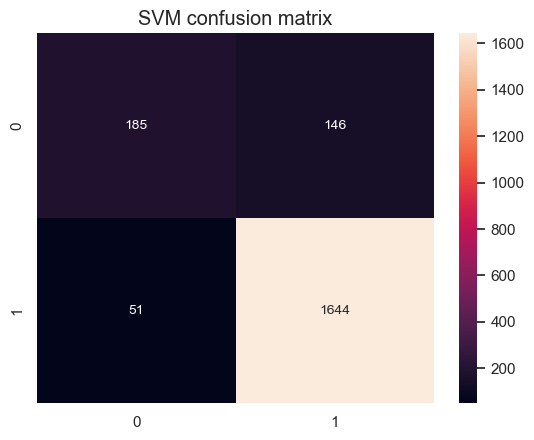

In [92]:
# Build the confusion matrix
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred_svm)
print(cm)
print(accuracy_score(y_test, y_pred_svm))
print(classification_report(y_test,y_pred_svm))
sns.heatmap(cm, annot=True, fmt='d').set_title('SVM confusion matrix')

## Decision Tree 

In [93]:
# Train the model
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
classifier.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [94]:
# Test the model
y_pred_dt = classifier.predict(X_test)
print(np.concatenate((y_pred_dt.reshape(len(y_pred_dt),1), y_test.reshape(len(y_test),1)),1))

[[1 1]
 [1 1]
 [1 1]
 ...
 [1 1]
 [1 1]
 [1 1]]


[[ 274   57]
 [  57 1638]]
0.9437314906219151
              precision    recall  f1-score   support

           0       0.83      0.83      0.83       331
           1       0.97      0.97      0.97      1695

    accuracy                           0.94      2026
   macro avg       0.90      0.90      0.90      2026
weighted avg       0.94      0.94      0.94      2026



Text(0.5, 1.0, 'Decision Tree confusion matrix')

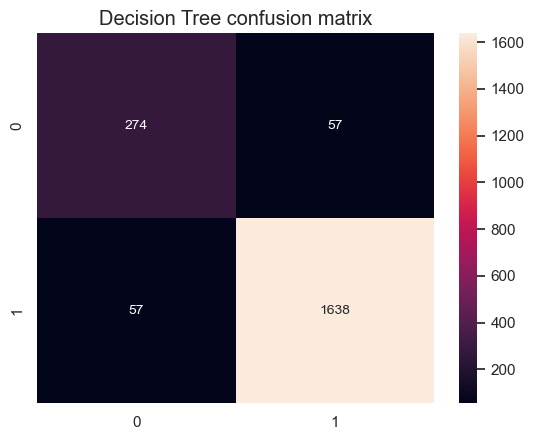

In [95]:
# Build the confusion matrix
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred_dt)
print(cm)
print(accuracy_score(y_test, y_pred_dt))
print(classification_report(y_test,y_pred_dt))
sns.heatmap(cm, annot=True, fmt='d').set_title('Decision Tree confusion matrix')

## Random Forest 

In [96]:
# Train the model
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
classifier.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=0)

In [97]:
# Test the model
y_pred_rf = classifier.predict(X_test)
print(np.concatenate((y_pred_rf.reshape(len(y_pred_rf),1), y_test.reshape(len(y_test),1)),1))

[[1 1]
 [1 1]
 [1 1]
 ...
 [1 1]
 [1 1]
 [1 1]]


[[ 277   54]
 [  33 1662]]
0.9570582428430404
              precision    recall  f1-score   support

           0       0.89      0.84      0.86       331
           1       0.97      0.98      0.97      1695

    accuracy                           0.96      2026
   macro avg       0.93      0.91      0.92      2026
weighted avg       0.96      0.96      0.96      2026



Text(0.5, 1.0, 'Random Forest confusion matrix')

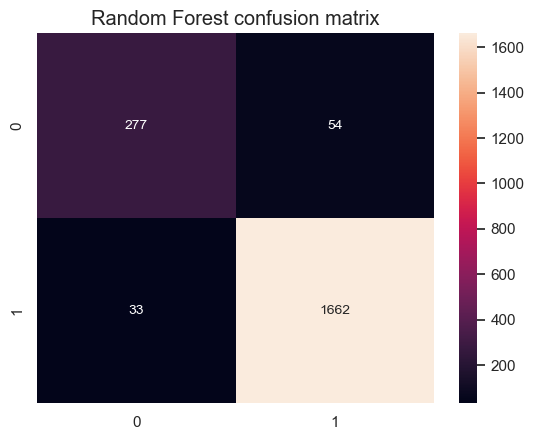

In [98]:
# Build the confusion matrix
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred_rf)
print(cm)
print(accuracy_score(y_test, y_pred_rf))
print(classification_report(y_test,y_pred_rf))
sns.heatmap(cm, annot=True, fmt='d').set_title('Random Forest confusion matrix')

## ANN

In [99]:
# Import tensorflow
import tensorflow as tf

In [100]:
# Initialzing the ANN 
ann = tf.keras.models.Sequential()
# Adding the input layer and the first hidden layer
ann.add(tf.keras.layers.Dense(units=12, activation='relu'))
# Adding the second hidden layer
ann.add(tf.keras.layers.Dense(units=12, activation='relu'))
# Adding the output layer
ann.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

In [101]:
# Compile the ANN
ann.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [102]:
# Train the ANN
ann.fit(X_train, y_train, batch_size = 32, epochs = 50)

Epoch 1/50
254/254 [==============================] - 2s 2ms/step - loss: 0.4616 - accuracy: 0.7736
Epoch 2/50
254/254 [==============================] - 1s 2ms/step - loss: 0.2856 - accuracy: 0.8874
Epoch 3/50
254/254 [==============================] - 1s 2ms/step - loss: 0.2431 - accuracy: 0.9047
Epoch 4/50
254/254 [==============================] - 1s 2ms/step - loss: 0.2210 - accuracy: 0.9115
Epoch 5/50
254/254 [==============================] - 1s 2ms/step - loss: 0.2042 - accuracy: 0.9193
Epoch 6/50
254/254 [==============================] - 1s 2ms/step - loss: 0.1896 - accuracy: 0.9252
Epoch 7/50
254/254 [==============================] - 1s 2ms/step - loss: 0.1794 - accuracy: 0.9295
Epoch 8/50
254/254 [==============================] - 1s 2ms/step - loss: 0.1718 - accuracy: 0.9332
Epoch 9/50
254/254 [==============================] - 1s 2ms/step - loss: 0.1649 - accuracy: 0.9333
Epoch 10/50
254/254 [==============================] - 1s 3ms/step - loss: 0.1614 - accuracy: 0.9353

In [103]:
# Test the model
y_pred_ann = ann.predict(X_test)
y_pred_ann = (y_pred_ann > 0.5)
print(np.concatenate((y_pred_ann.reshape(len(y_pred_ann),1), y_test.reshape(len(y_test),1)),1))

64/64 [==============================] - 0s 2ms/step
[[1 1]
 [1 1]
 [1 1]
 ...
 [1 1]
 [1 1]
 [1 1]]


[[ 264   67]
 [  63 1632]]
0.9358341559723593
              precision    recall  f1-score   support

           0       0.81      0.80      0.80       331
           1       0.96      0.96      0.96      1695

    accuracy                           0.94      2026
   macro avg       0.88      0.88      0.88      2026
weighted avg       0.94      0.94      0.94      2026



Text(0.5, 1.0, 'ANN confusion matrix')

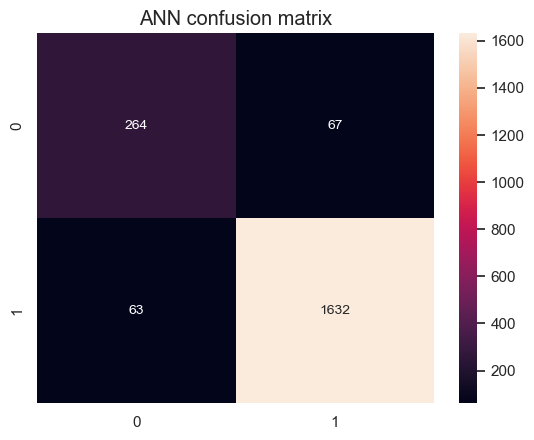

In [105]:
# Build the confusion matrix
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred_ann)
print(cm)
print(accuracy_score(y_test, y_pred_ann))
print(classification_report(y_test,y_pred_ann))
sns.heatmap(cm, annot=True, fmt='d').set_title('ANN confusion matrix')

In [113]:
import pandas as pd
from sklearn.metrics import confusion_matrix, accuracy_score
from tabulate import tabulate

# Define the model names and corresponding predictions
model_names = ['k-NN', 'Logistic Regression', 'SVM', 'Decision Tree', 'Random Forest', 'ANN']
predictions = [y_pred_knn, y_pred_lr, y_pred_svm, y_pred_dt, y_pred_rf, y_pred_ann]
test_labels = [y_test] * len(model_names)

# Initialize empty lists to store accuracy scores and confusion matrices
accuracy_scores = []
confusion_matrices = []

# Calculate accuracy scores and confusion matrices for each model
for prediction, test_label in zip(predictions, test_labels):
    accuracy = accuracy_score(test_label, prediction)
    matrix = confusion_matrix(test_label, prediction)
    accuracy_scores.append(accuracy)
    confusion_matrices.append(matrix)

# Create a DataFrame to store the results
results_df = pd.DataFrame({
    'Model': model_names,
    'Accuracy': accuracy_scores,
    'Confusion Matrix': confusion_matrices
})

# Sort the DataFrame by accuracy in ascending order
results_df.sort_values(by='Accuracy', ascending=True, inplace=True)

# Convert the DataFrame to an interactive table with color coding
table = tabulate(results_df, headers='keys', tablefmt='html', 
                 numalign="center", stralign="center",
                 colalign=("center", "center", "center"),
                 floatfmt=".4f", 
                 disable_numparse=True,
                 showindex=True)

# Apply color coding to the table rows based on accuracy
color_table = table.replace('<tr>', '<tr style="background-color: #FFCCCC;">', 1)
color_table = color_table.replace('<tr>', '<tr style="background-color: #CCFFCC;">', -1)

# Display the colorful interactive table
from IPython.display import display, HTML
display(HTML(color_table))


,Model,Accuracy,Confusion Matrix
2,SVM,0.9027640671273445,[[ 185 146] [ 51 1644]]
1,Logistic Regression,0.9032576505429417,[[ 190 141] [ 55 1640]]
0,k-NN,0.9151036525172754,[[ 200 131] [ 41 1654]]
5,ANN,0.9358341559723593,[[ 264 67] [ 63 1632]]
3,Decision Tree,0.9437314906219151,[[ 274 57] [ 57 1638]]
4,Random Forest,0.9570582428430404,[[ 277 54] [ 33 1662]]
